# Reto 02:

¡Hagamos un segmentador que corte una imagen por ti! Con los algoritmos del ejemplo 01 y 02 y con una imagen sobre un fondo blanco, realiza lo siguiente: 
1) Transforma la imagen en escala de grises. 
2) Binariza y genera negativos, de tal manera que los pixeles del objeto sean 1 (no 255)
3) Multiplica los canales de la imagen original contra la imagen binaria utilizando np.multiply. Esto hará que los pixeles que esten marcados con 1 se conserven y los que estén marcados con 0 se borren.

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

<class 'numpy.ndarray'>


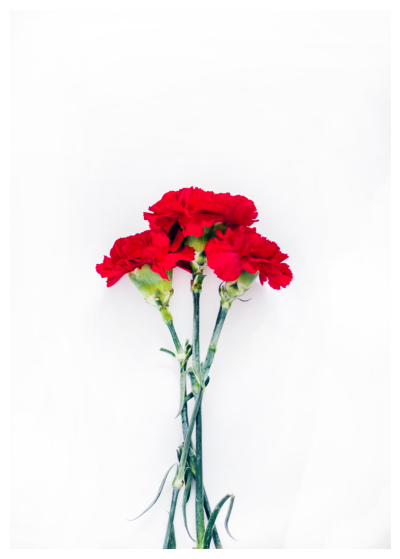

In [2]:
imageOpenCV = cv2.imread("roses.jpg", cv2.IMREAD_COLOR)
imagen = cv2.cvtColor(imageOpenCV, cv2.COLOR_BGR2RGB)
print(type(imagen))
plt.figure(figsize=(7,7))
plt.axis('off')
plt.imshow(imagen)
plt.show()

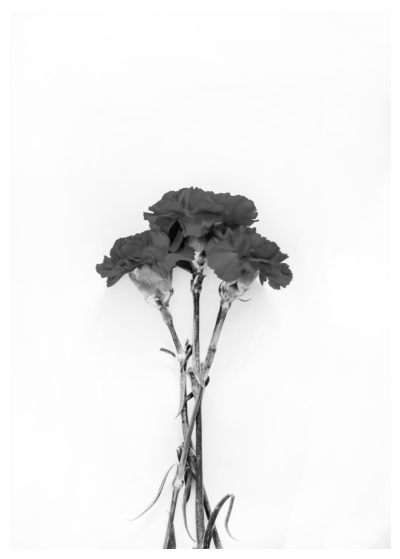

In [3]:
# Realiza lo siguiente: 1) transforma la imagen en escala de grises.
def convertirAGrayScale(imagen):
    imagen_grayscale = np.sum(imagen,axis = 2)
    imagen_grayscale = imagen_grayscale / 3
    return imagen_grayscale

imagen_gris = convertirAGrayScale(imagen)
plt.figure(figsize=(7,7))
plt.axis('off')
plt.imshow(imagen_gris, cmap=plt.cm.gray)
plt.show()

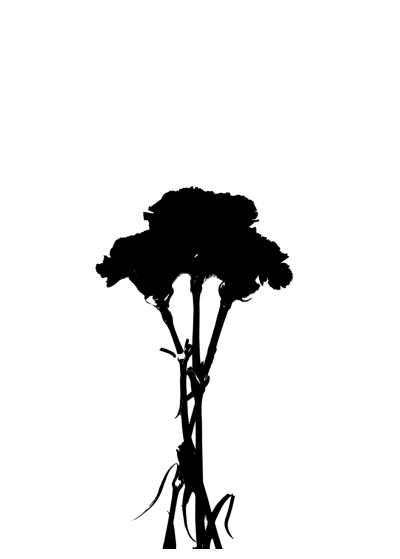

In [4]:
# 2) Binariza y genera negativos, de tal manera que los pixeles del objeto sean 1 (no 255) y finalmente
def binarizar(imagen_gris, threshold):
    imgBinaria = np.where(imagen_gris > threshold, 255, 0)
    return imgBinaria

imagen_bin = binarizar(imagen_gris, 215)
plt.figure(figsize=(7,7))
plt.axis('off')
plt.imshow(imagen_bin, cmap=plt.cm.gray)
plt.show()

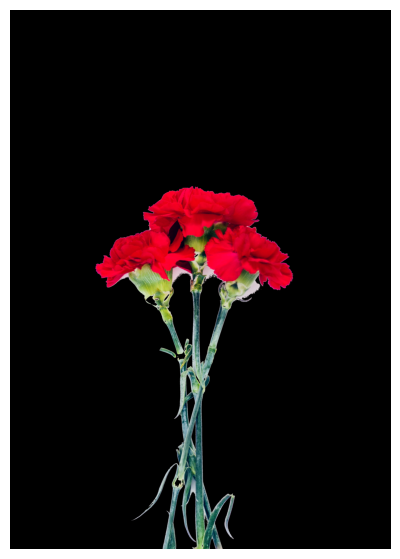

In [5]:
# 3) multiplica los canales de la imagen original contra la imagen binaria utilizando np.multiply. Esto hará que los pixeles que esten marcados con 1 se conserven y los que estén marcados con 0 se borren.
def recortar(imgOriginal, imgBinarizada):
    patronBinario = np.where(imgBinarizada > 0, 0, 1)
    imgRecortada_rojo = np.multiply(imgOriginal[:,:,0],patronBinario)
    imgRecortada_verde = np.multiply(imgOriginal[:,:,1],patronBinario)
    imgRecortada_azul = np.multiply(imgOriginal[:,:,2],patronBinario)
    imgRecortada = np.dstack((imgRecortada_rojo, imgRecortada_verde, imgRecortada_azul))
    return imgRecortada

imagen_recortada = recortar(imagen, imagen_bin)

plt.figure(figsize=(7,7))
plt.axis('off')
plt.imshow(imagen_recortada)
plt.show()